In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('global_laptop_selling_data.xlsx')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df1=df.copy()
df2=df.copy()
df3=df.copy()
df4=df.copy()

# Data Analysis

In [5]:
df.shape

(1303, 13)

In [6]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [8]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [9]:
df.drop(['laptop_ID'],axis=1,inplace=True)

In [10]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [11]:
df.nunique()

Company              19
Product             618
TypeName              6
Inches               18
ScreenResolution     40
Cpu                 118
Ram                   9
Memory               39
Gpu                 106
OpSys                 9
Weight              179
Price_euros         791
dtype: int64

# Data Cleaning techniques

# Screen Resulation

In [12]:
df[['SR_Width', 'SR_Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(int)
df['ScreenName'] = df['ScreenResolution'].str.extract(r'([A-Za-z\s]+)')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SR_Width,SR_Height,ScreenName
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,IPS Panel Retina Display
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,x
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,Full HD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,IPS Panel Retina Display
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,IPS Panel Retina Display


In [13]:
df.drop(['ScreenResolution'],axis=1,inplace=True)

In [14]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SR_Width,SR_Height,ScreenName
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,IPS Panel Retina Display
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,x
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,Full HD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,IPS Panel Retina Display
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,IPS Panel Retina Display


# Cpu

In [15]:
def extract_cpu_series(cpu):
    if 'AMD' in cpu:
        return 'AMD'
    elif 'Intel Core i' in cpu:
        return 'Intel Core '+cpu.split(' ')[2]
    else:
        return 'Intel Other'
    
df['PBrand'] = df['Cpu'].apply(extract_cpu_series)
df['PSpeed(GHz)'] = df['Cpu'].str.extract(r'\s([\d\.]+)GHz').astype(float)
df.drop(['Cpu'],axis=1,inplace=True)
df.head()

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SR_Width,SR_Height,ScreenName,PBrand,PSpeed(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,IPS Panel Retina Display,Intel Core i5,2.3
1,Apple,Macbook Air,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,x,Intel Core i5,1.8
2,HP,250 G6,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,Full HD,Intel Core i5,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,IPS Panel Retina Display,Intel Core i7,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,IPS Panel Retina Display,Intel Core i5,3.1


# GPU

In [16]:
df[['G_model', 'G_number']] = df['Gpu'].str.rsplit(n=1, expand=True)
df.drop('Gpu', axis=1, inplace=True)

df.head()

,Company,Product,TypeName,Inches,Ram,Memory,OpSys,Weight,Price_euros,SR_Width,SR_Height,ScreenName,PBrand,PSpeed(GHz),G_model,G_number
0,Apple,MacBook Pro,Ultrabook,13.3,8GB,128GB SSD,macOS,1.37kg,1339.69,2560,1600,IPS Panel Retina Display,Intel Core i5,2.3,Intel Iris Plus Graphics,640
1,Apple,Macbook Air,Ultrabook,13.3,8GB,128GB Flash Storage,macOS,1.34kg,898.94,1440,900,x,Intel Core i5,1.8,Intel HD Graphics,6000
2,HP,250 G6,Notebook,15.6,8GB,256GB SSD,No OS,1.86kg,575.00,1920,1080,Full HD,Intel Core i5,2.5,Intel HD Graphics,620
3,Apple,MacBook Pro,Ultrabook,15.4,16GB,512GB SSD,macOS,1.83kg,2537.45,2880,1800,IPS Panel Retina Display,Intel Core i7,2.7,AMD Radeon Pro,455
4,Apple,MacBook Pro,Ultrabook,13.3,8GB,256GB SSD,macOS,1.37kg,1803.60,2560,1600,IPS Panel Retina Display,Intel Core i5,3.1,Intel Iris Plus Graphics,650


# RAM

In [17]:
df['Ram'] = df['Ram'].str.extract(r'(\d+\.\d+|\d+)')
df.head()

,Company,Product,TypeName,Inches,Ram,Memory,OpSys,Weight,Price_euros,SR_Width,SR_Height,ScreenName,PBrand,PSpeed(GHz),G_model,G_number
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,macOS,1.37kg,1339.69,2560,1600,IPS Panel Retina Display,Intel Core i5,2.3,Intel Iris Plus Graphics,640
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,macOS,1.34kg,898.94,1440,900,x,Intel Core i5,1.8,Intel HD Graphics,6000
2,HP,250 G6,Notebook,15.6,8,256GB SSD,No OS,1.86kg,575.00,1920,1080,Full HD,Intel Core i5,2.5,Intel HD Graphics,620
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,macOS,1.83kg,2537.45,2880,1800,IPS Panel Retina Display,Intel Core i7,2.7,AMD Radeon Pro,455
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,macOS,1.37kg,1803.60,2560,1600,IPS Panel Retina Display,Intel Core i5,3.1,Intel Iris Plus Graphics,650


# Weight

In [18]:
df['Weight'] = df['Weight'].str.extract(r'(\d+\.\d+|\d+)')
df.head()

,Company,Product,TypeName,Inches,Ram,Memory,OpSys,Weight,Price_euros,SR_Width,SR_Height,ScreenName,PBrand,PSpeed(GHz),G_model,G_number
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,macOS,1.37,1339.69,2560,1600,IPS Panel Retina Display,Intel Core i5,2.3,Intel Iris Plus Graphics,640
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,macOS,1.34,898.94,1440,900,x,Intel Core i5,1.8,Intel HD Graphics,6000
2,HP,250 G6,Notebook,15.6,8,256GB SSD,No OS,1.86,575.00,1920,1080,Full HD,Intel Core i5,2.5,Intel HD Graphics,620
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,macOS,1.83,2537.45,2880,1800,IPS Panel Retina Display,Intel Core i7,2.7,AMD Radeon Pro,455
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,macOS,1.37,1803.60,2560,1600,IPS Panel Retina Display,Intel Core i5,3.1,Intel Iris Plus Graphics,650


# Memory

In [19]:
df['SSD(GB)'] = df['Memory'].str.extract(r'(\d+)GB SSD').fillna('0').astype(int)
df['HDD(GB)'] = df['Memory'].str.extract(r'(\d+)GB HDD').fillna('0').astype(int)
df.drop(['Memory'], axis=1, inplace=True)
df.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,SR_Width,SR_Height,ScreenName,PBrand,PSpeed(GHz),G_model,G_number,SSD(GB),HDD(GB)
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,2560,1600,IPS Panel Retina Display,Intel Core i5,2.3,Intel Iris Plus Graphics,640,128,0
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,1440,900,x,Intel Core i5,1.8,Intel HD Graphics,6000,0,0
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,1920,1080,Full HD,Intel Core i5,2.5,Intel HD Graphics,620,256,0
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,2880,1800,IPS Panel Retina Display,Intel Core i7,2.7,AMD Radeon Pro,455,512,0
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,2560,1600,IPS Panel Retina Display,Intel Core i5,3.1,Intel Iris Plus Graphics,650,256,0


In [20]:
df.isnull().sum()

Company        0
Product        0
TypeName       0
Inches         0
Ram            0
OpSys          0
Weight         0
Price_euros    0
SR_Width       0
SR_Height      0
ScreenName     0
PBrand         0
PSpeed(GHz)    0
G_model        0
G_number       0
SSD(GB)        0
HDD(GB)        0
dtype: int64

# After cleaning the New Data Set

In [21]:
df.to_excel('Configuration.xlsx')

# ML Regression Algorithms

In [22]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import gradio as gr
from matplotlib import pyplot as plt
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Data analysis

In [23]:
df = pd.read_excel('Configuration.xlsx')
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,SR_Width,SR_Height,ScreenName,PBrand,PSpeed(GHz),G_model,G_number,SSD(GB),HDD(GB)
0,0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,2560,1600,IPS Panel Retina Display,Intel Core i5,2.3,Intel Iris Plus Graphics,640,128,0
1,1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,1440,900,x,Intel Core i5,1.8,Intel HD Graphics,6000,0,0
2,2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,1920,1080,Full HD,Intel Core i5,2.5,Intel HD Graphics,620,256,0
3,3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,2880,1800,IPS Panel Retina Display,Intel Core i7,2.7,AMD Radeon Pro,455,512,0
4,4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,2560,1600,IPS Panel Retina Display,Intel Core i5,3.1,Intel Iris Plus Graphics,650,256,0


In [24]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [25]:
df.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,SR_Width,SR_Height,ScreenName,PBrand,PSpeed(GHz),G_model,G_number,SSD(GB),HDD(GB)
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,2560,1600,IPS Panel Retina Display,Intel Core i5,2.3,Intel Iris Plus Graphics,640,128,0
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,1440,900,x,Intel Core i5,1.8,Intel HD Graphics,6000,0,0
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,1920,1080,Full HD,Intel Core i5,2.5,Intel HD Graphics,620,256,0
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,2880,1800,IPS Panel Retina Display,Intel Core i7,2.7,AMD Radeon Pro,455,512,0
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,2560,1600,IPS Panel Retina Display,Intel Core i5,3.1,Intel Iris Plus Graphics,650,256,0


In [26]:
df.isnull().sum()

Company        0
Product        0
TypeName       0
Inches         0
Ram            0
OpSys          0
Weight         0
Price_euros    0
SR_Width       0
SR_Height      0
ScreenName     0
PBrand         0
PSpeed(GHz)    0
G_model        0
G_number       0
SSD(GB)        0
HDD(GB)        0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Product      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Inches       1303 non-null   float64
 4   Ram          1303 non-null   int64  
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float64
 7   Price_euros  1303 non-null   float64
 8   SR_Width     1303 non-null   int64  
 9   SR_Height    1303 non-null   int64  
 10  ScreenName   1303 non-null   object 
 11  PBrand       1303 non-null   object 
 12  PSpeed(GHz)  1303 non-null   float64
 13  G_model      1303 non-null   object 
 14  G_number     1303 non-null   object 
 15  SSD(GB)      1303 non-null   int64  
 16  HDD(GB)      1303 non-null   int64  
dtypes: float64(4), int64(5), object(8)
memory usage: 173.2+ KB


In [28]:
df.corr(numeric_only=1)

,Inches,Ram,Weight,Price_euros,SR_Width,SR_Height,PSpeed(GHz),SSD(GB),HDD(GB)
Inches,1.000000,0.237993,0.827631,0.068197,-0.071245,-0.095404,0.307870,-0.126171,0.073153
Ram,0.237993,1.000000,0.383874,0.743007,0.433121,0.424437,0.368000,0.464235,-0.269222
Weight,0.827631,0.383874,1.000000,0.210370,-0.032880,-0.053846,0.320434,-0.095005,0.018101
Price_euros,0.068197,0.743007,0.210370,1.000000,0.556529,0.552809,0.430293,0.552890,-0.234620
SR_Width,-0.071245,0.433121,-0.032880,0.556529,1.000000,0.994219,0.183548,0.420827,-0.263389
SR_Height,-0.095404,0.424437,-0.053846,0.552809,0.994219,1.000000,0.169668,0.416327,-0.263813
PSpeed(GHz),0.307870,0.368000,0.320434,0.430293,0.183548,0.169668,1.000000,0.248292,-0.111358
SSD(GB),-0.126171,0.464235,-0.095005,0.552890,0.420827,0.416327,0.248292,1.000000,-0.349485
HDD(GB),0.073153,-0.269222,0.018101,-0.234620,-0.263389,-0.263813,-0.111358,-0.349485,1.000000


# Visualization

<Figure size 2000x1800 with 0 Axes>

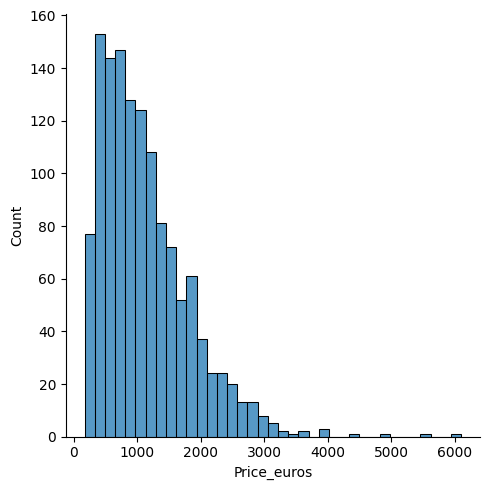

In [29]:
plt.figure(figsize=(20,18))
sns.displot(df['Price_euros'])

<function matplotlib.pyplot.show(close=None, block=None)>

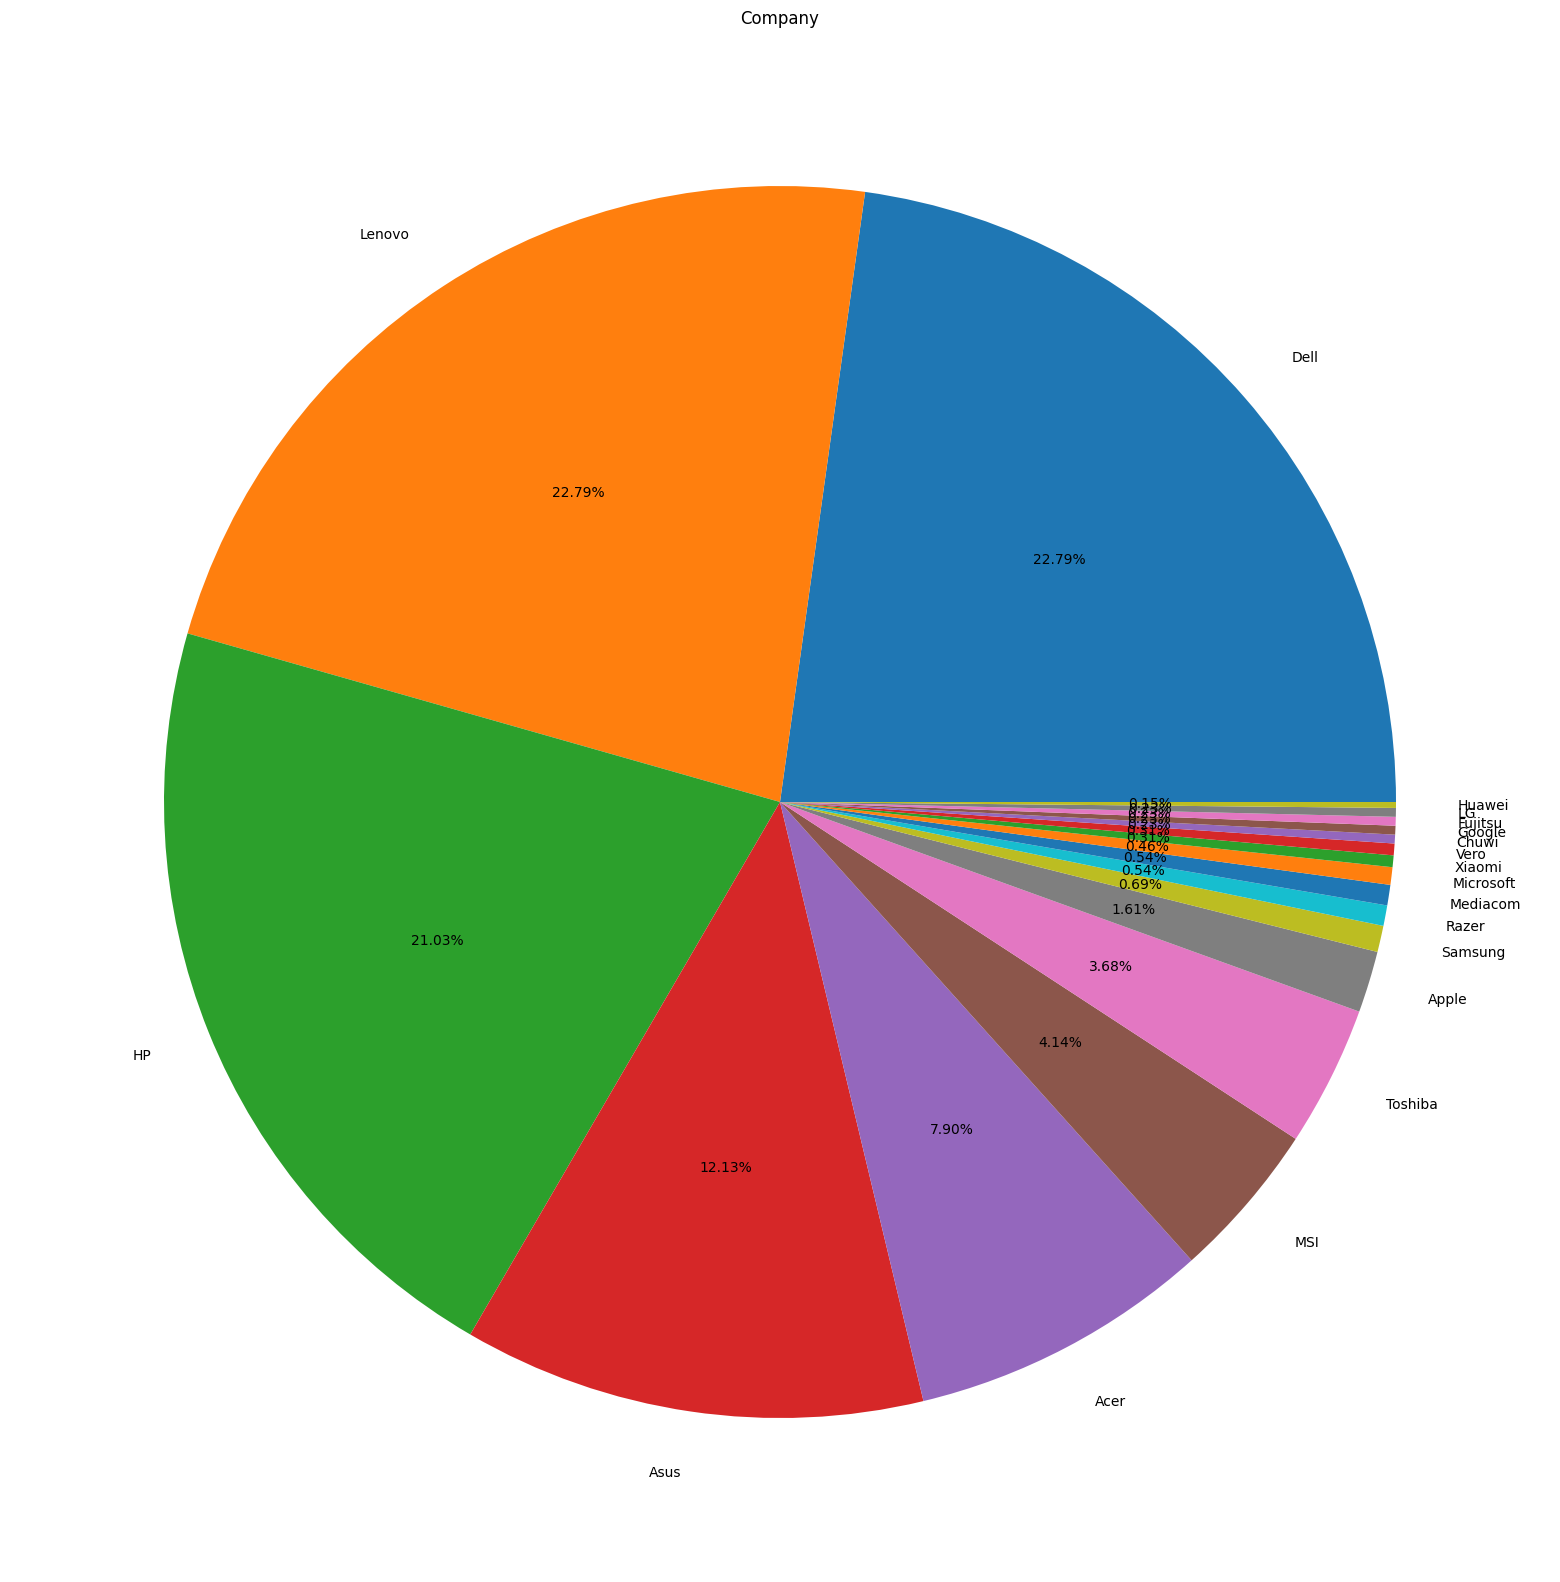

In [30]:
plt.figure(figsize=(20,20))
plt.pie(x = df['Company'].value_counts() ,autopct='%1.2f%%' ,labels=df['Company'].value_counts().index)
plt.title('Company')
plt.show

In [31]:
df.nunique()

Company         19
Product        618
TypeName         6
Inches          18
Ram              9
OpSys            9
Weight         171
Price_euros    791
SR_Width        13
SR_Height       10
ScreenName      10
PBrand           5
PSpeed(GHz)     25
G_model         26
G_number        85
SSD(GB)         10
HDD(GB)          4
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Product      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Inches       1303 non-null   float64
 4   Ram          1303 non-null   int64  
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float64
 7   Price_euros  1303 non-null   float64
 8   SR_Width     1303 non-null   int64  
 9   SR_Height    1303 non-null   int64  
 10  ScreenName   1303 non-null   object 
 11  PBrand       1303 non-null   object 
 12  PSpeed(GHz)  1303 non-null   float64
 13  G_model      1303 non-null   object 
 14  G_number     1303 non-null   object 
 15  SSD(GB)      1303 non-null   int64  
 16  HDD(GB)      1303 non-null   int64  
dtypes: float64(4), int64(5), object(8)
memory usage: 173.2+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

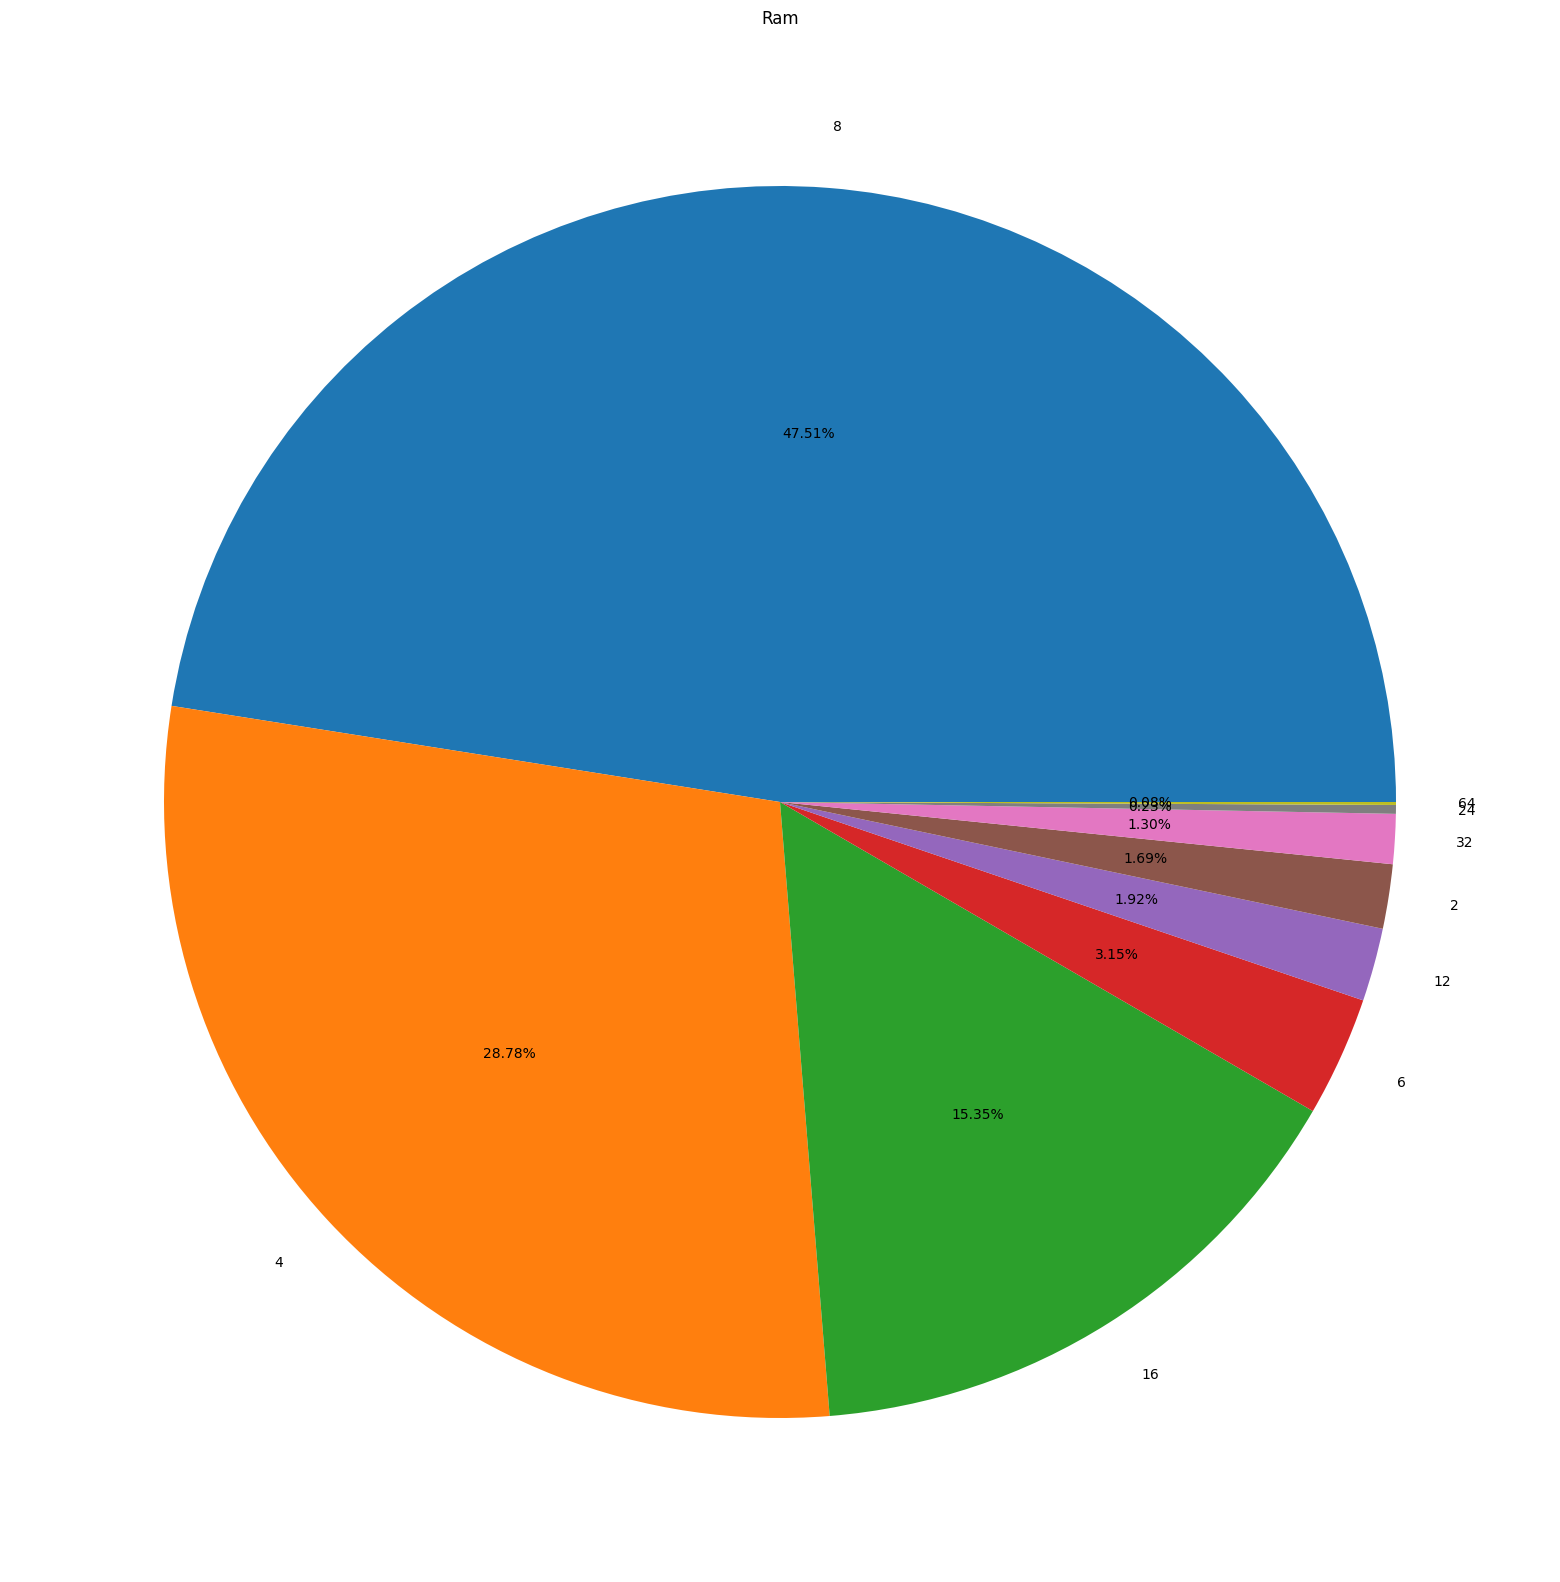

In [33]:
plt.figure(figsize=(20,20))
plt.pie(x = df['Ram'].value_counts() ,autopct='%1.2f%%' ,labels=df['Ram'].value_counts().index)
plt.title('Ram')
plt.show

In [34]:
numeric_features = df.select_dtypes(include=np.number).columns
numeric_features

Index(['Inches', 'Ram', 'Weight', 'Price_euros', 'SR_Width', 'SR_Height',
       'PSpeed(GHz)', 'SSD(GB)', 'HDD(GB)'],
      dtype='object')

In [35]:
categorical_features = df.select_dtypes(include='object').columns
categorical_features

Index(['Company', 'Product', 'TypeName', 'OpSys', 'ScreenName', 'PBrand',
       'G_model', 'G_number'],
      dtype='object')

In [36]:
df.duplicated().sum()
df.shape

(1303, 17)

In [37]:
df.drop_duplicates(inplace=True)
df.shape

(1275, 17)

In [38]:

numeric_features=['Inches', 'Ram', 'Weight', 'Price_euros', 'SR_Width', 'SR_Height',
       'PSpeed(GHz)', 'SSD(GB)', 'HDD(GB)']
categorical_features=['Company', 'Product', 'TypeName', 'OpSys', 'ScreenName', 'PBrand',
       'G_model', 'G_number']

# Visualizing continuous columns

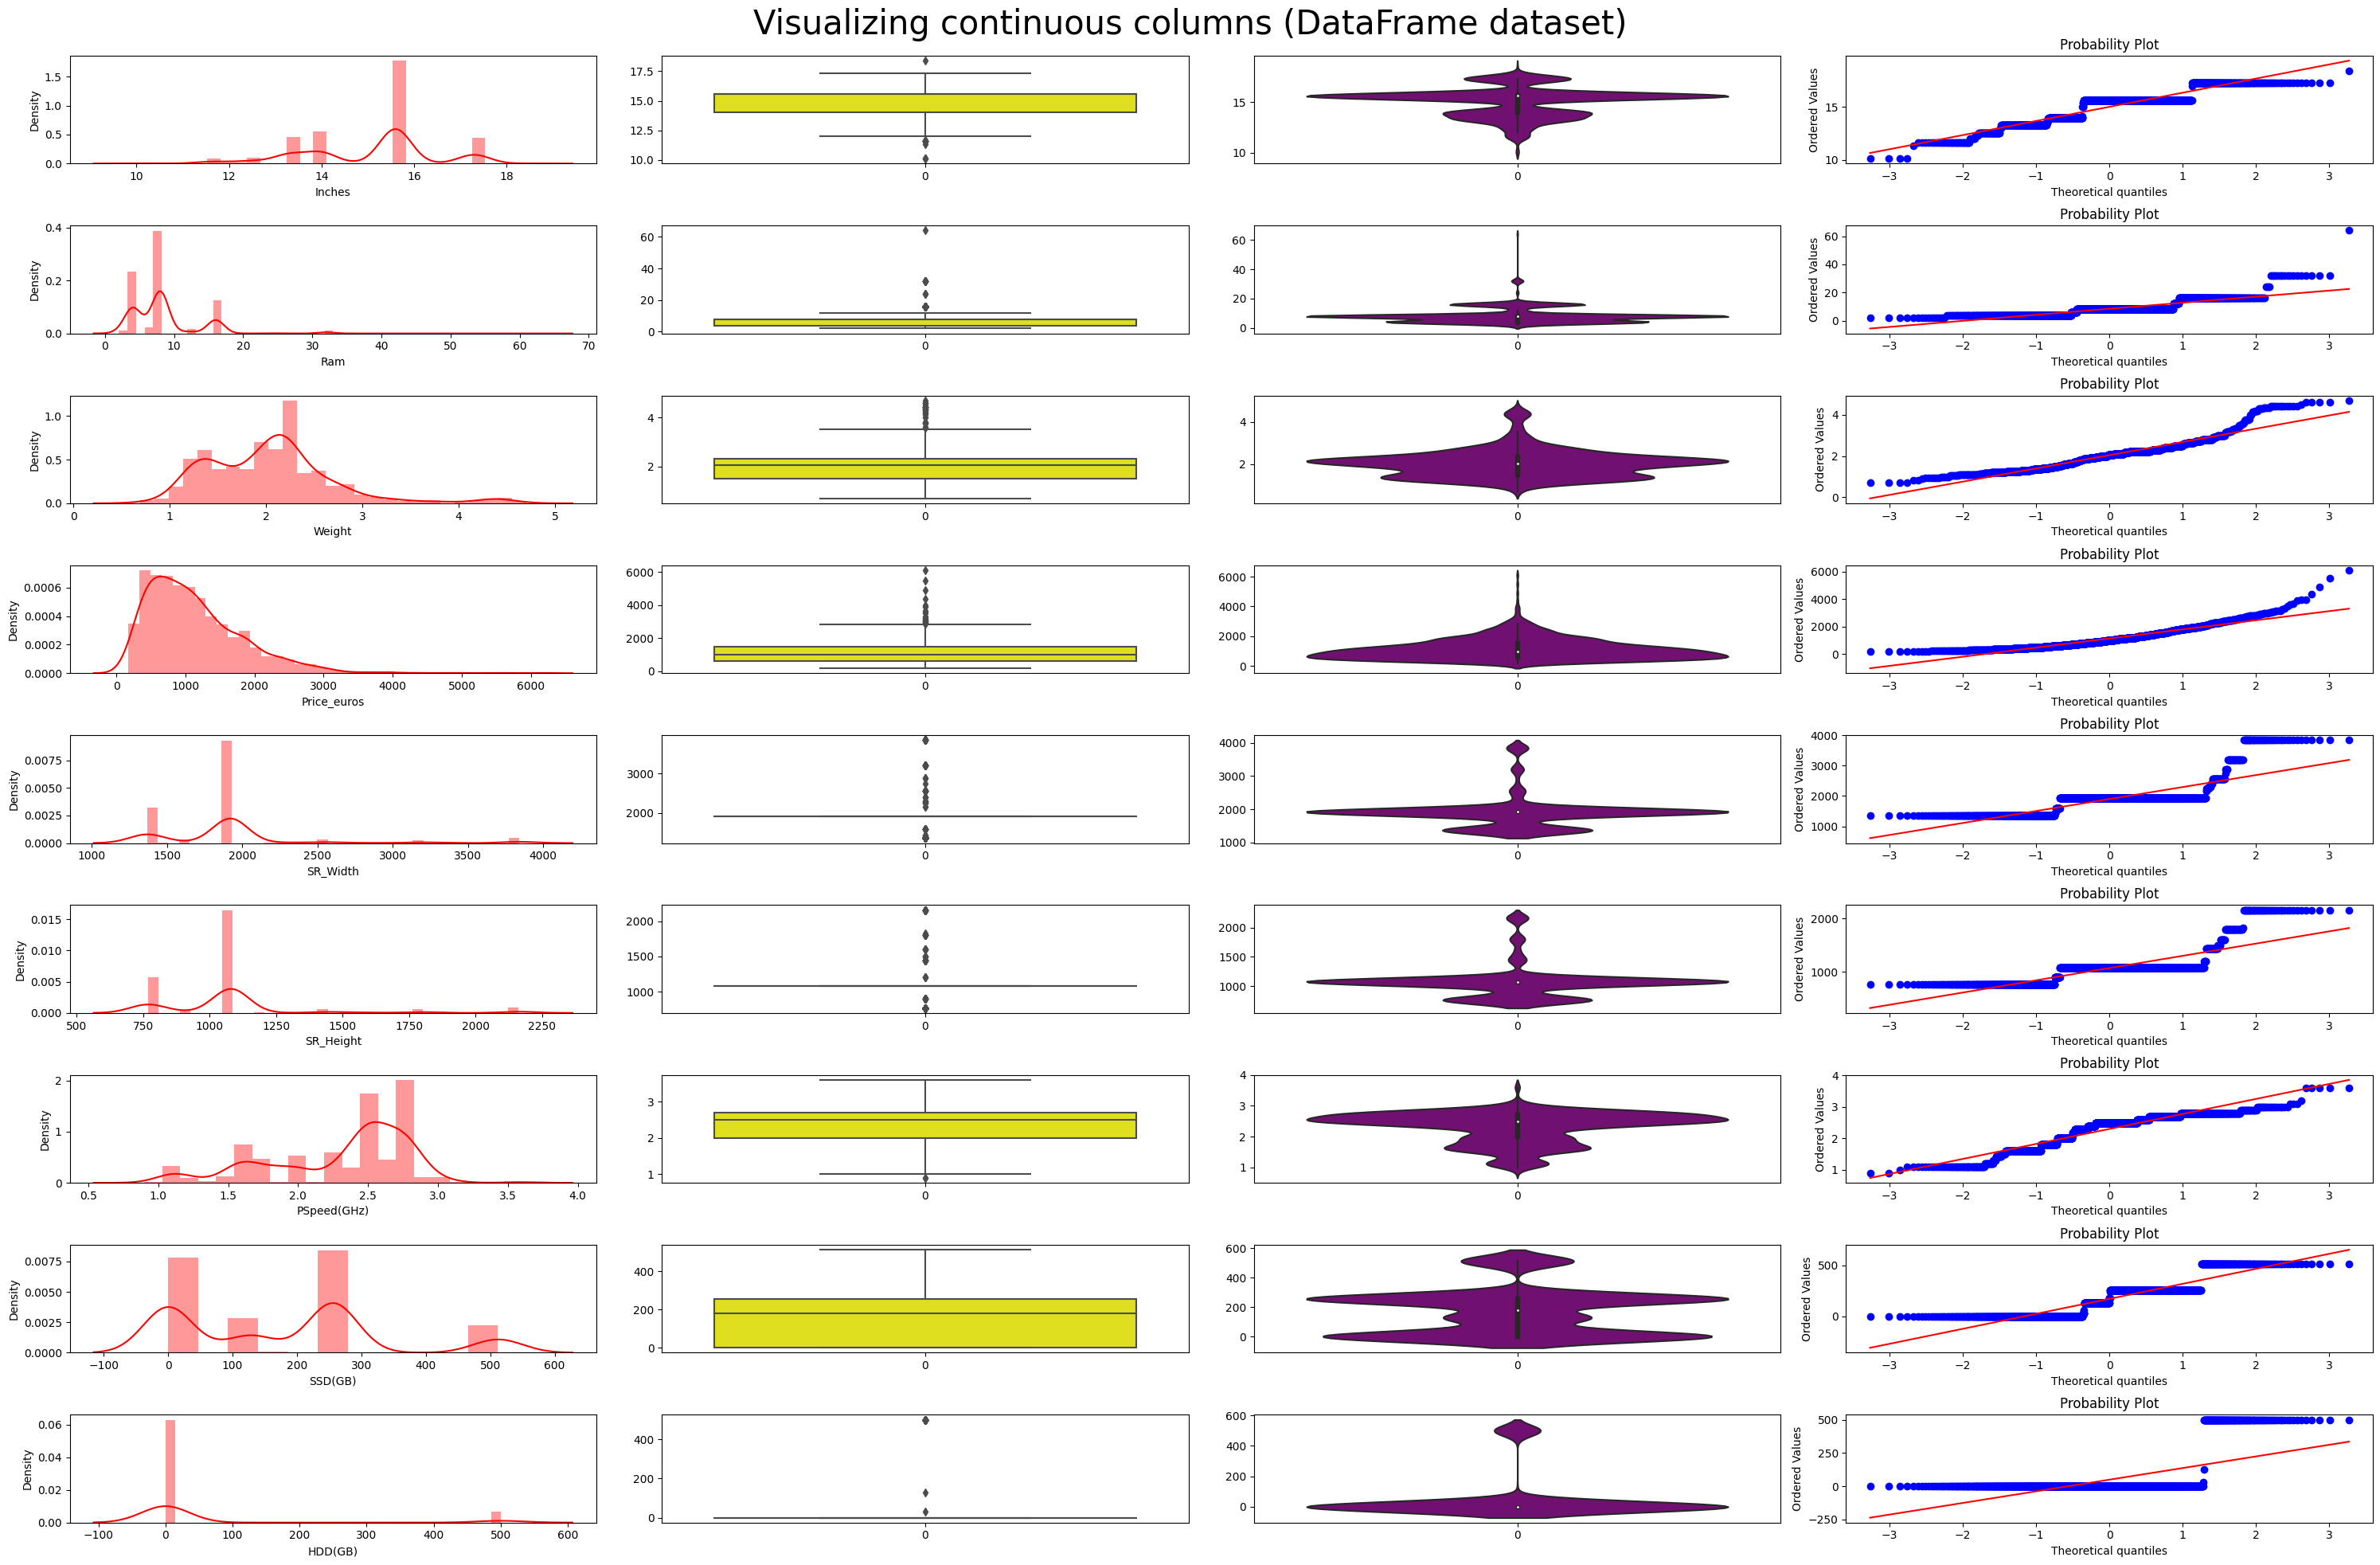

In [39]:
fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(df[i],ax=ax[index,0],color='red')
    sns.boxplot(df[i],ax=ax[index,1],color='yellow')
    sns.violinplot(df[i],ax=ax[index,2],color='purple')
    stats.probplot(df[i],plot=ax[index,3])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (DataFrame dataset)",fontsize=30)
plt.show()

# Encoding Dataset

In [40]:
le = LabelEncoder()
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])
df.head(10)

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,SR_Width,SR_Height,ScreenName,PBrand,PSpeed(GHz),G_model,G_number,SSD(GB),HDD(GB)
0,1,300,4,13.3,8,8,1.37,1339.69,2560,1600,4,2,2.3,16,29,128,0
1,1,301,4,13.3,8,8,1.34,898.94,1440,900,9,2,1.8,14,25,0,0
2,7,50,3,15.6,8,4,1.86,575.00,1920,1080,0,2,2.5,14,27,256,0
3,1,300,4,15.4,16,8,1.83,2537.45,2880,1800,4,3,2.7,4,12,512,0
4,1,300,4,13.3,8,8,1.37,1803.60,2560,1600,4,2,3.1,16,30,256,0
5,0,58,3,15.6,4,5,2.10,400.00,1366,768,9,0,3.0,3,78,0,500
6,1,300,4,15.4,16,3,2.04,2139.97,2880,1800,4,3,2.2,17,48,0,0
7,1,301,4,13.3,8,8,1.34,1158.70,1440,900,9,2,1.8,14,25,0,0
8,2,608,4,14.0,16,5,1.30,1495.00,1920,1080,0,3,1.8,20,73,512,0
9,0,430,4,14.0,8,5,1.60,770.00,1920,1080,2,2,1.6,18,27,256,0


In [41]:
df.corr()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,SR_Width,SR_Height,ScreenName,PBrand,PSpeed(GHz),G_model,G_number,SSD(GB),HDD(GB)
Company,1.000000,0.069802,0.001678,-0.082380,0.041771,0.127853,-0.128194,0.136541,0.046347,0.043498,-0.079894,0.021126,0.133191,0.030856,-0.079121,0.133805,-0.003079
Product,0.069802,1.000000,0.076330,-0.213195,0.018830,0.114857,-0.244554,0.142888,0.157595,0.158163,-0.031174,0.122163,-0.043060,0.105437,-0.000840,0.184377,-0.073087
TypeName,0.001678,0.076330,1.000000,-0.086162,-0.242265,0.090069,-0.275440,-0.125648,-0.074363,-0.059244,0.116500,-0.123579,-0.082810,-0.257878,0.194881,-0.050386,0.111045
Inches,-0.082380,-0.213195,-0.086162,1.000000,0.241078,0.039672,0.826638,0.066608,-0.068223,-0.093062,-0.098905,-0.182862,0.305037,0.183796,0.149925,-0.120795,0.066022
Ram,0.041771,0.018830,-0.242265,0.241078,1.000000,0.140002,0.389370,0.740287,0.424089,0.415241,-0.287804,0.241197,0.366254,0.361984,-0.018322,0.457600,-0.262993
OpSys,0.127853,0.114857,0.090069,0.039672,0.140002,1.000000,0.011309,0.290199,0.148355,0.149078,-0.136792,-0.110859,0.219762,0.064264,0.003014,0.240793,-0.011488
Weight,-0.128194,-0.244554,-0.275440,0.826638,0.389370,0.011309,1.000000,0.211883,-0.028605,-0.050106,-0.091626,-0.054409,0.318649,0.309821,0.064614,-0.087762,0.011194
Price_euros,0.136541,0.142888,-0.125648,0.066608,0.740287,0.290199,0.211883,1.000000,0.552491,0.548529,-0.309822,0.264243,0.428847,0.398593,-0.085615,0.550619,-0.228248
SR_Width,0.046347,0.157595,-0.074363,-0.068223,0.424089,0.148355,-0.028605,0.552491,1.000000,0.994069,-0.334864,0.170599,0.178659,0.220339,-0.041906,0.408725,-0.255690
SR_Height,0.043498,0.158163,-0.059244,-0.093062,0.415241,0.149078,-0.050106,0.548529,0.994069,1.000000,-0.315776,0.175907,0.164369,0.209518,-0.043343,0.404246,-0.256189


<Axes: title={'center': 'Correlation for every column'}>

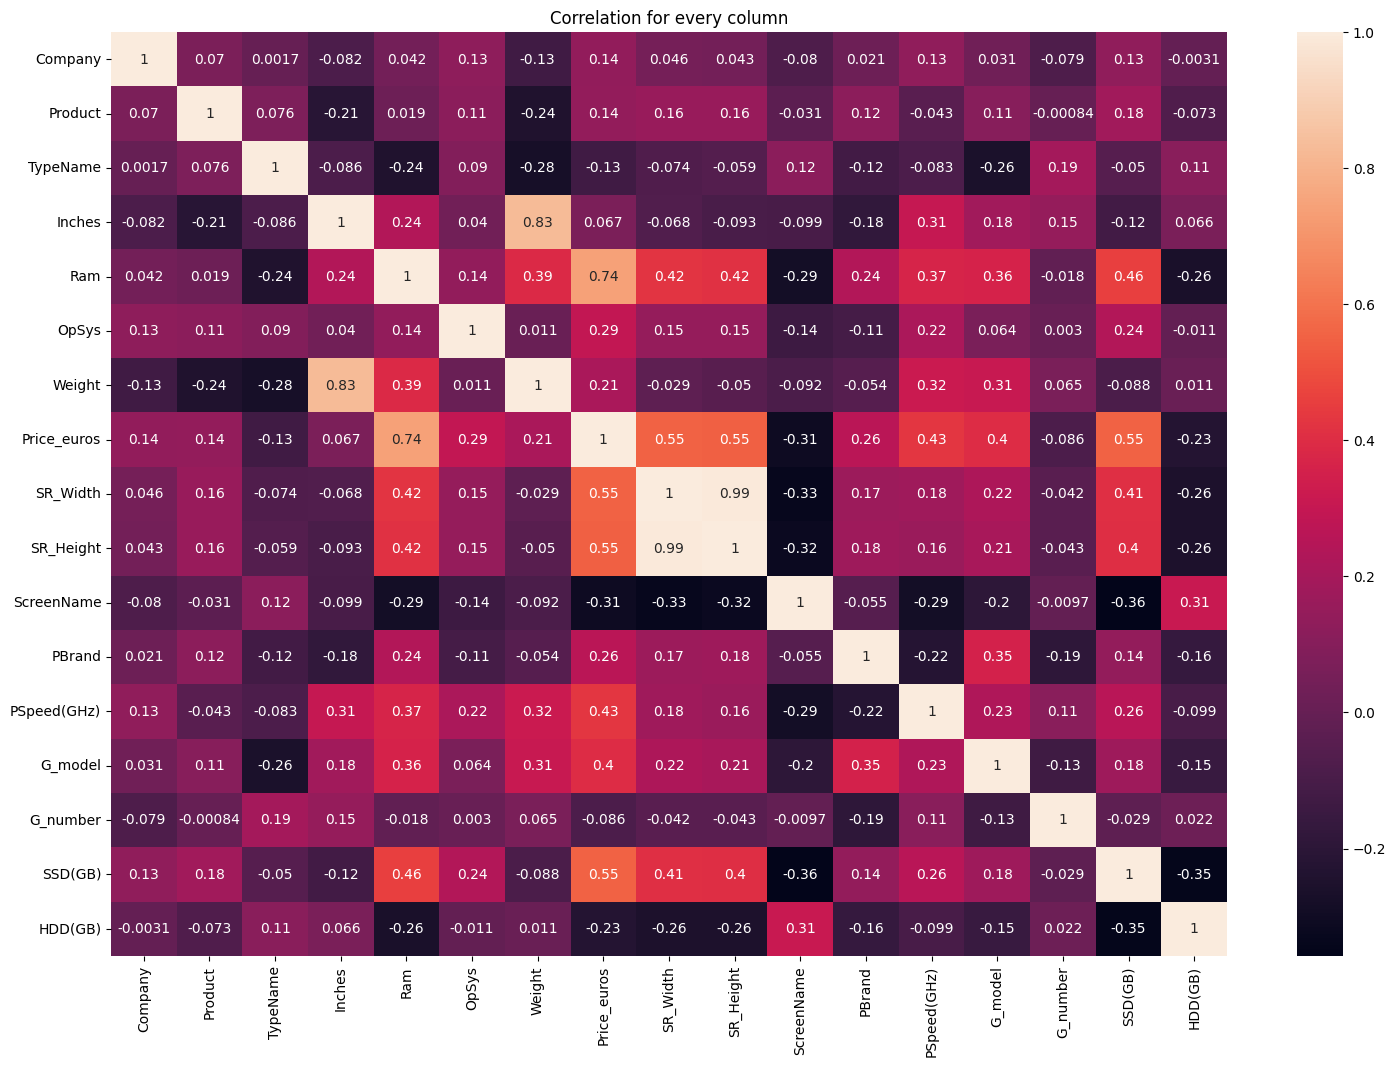

In [42]:
plt.figure(figsize=(18,12))
plt.title('Correlation for every column')
sns.heatmap(df.corr(), annot=True)

# Split train(x) and test(y) Data

In [43]:
x = df.drop('Price_euros',axis=1)

In [44]:
y = df['Price_euros']

In [45]:
y.head()

0    1339.69
1     898.94
2     575.00
3    2537.45
4    1803.60
Name: Price_euros, dtype: float64

# Training Data

In [46]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=42)

# Regression Algorithms

# Linear Regression

In [47]:
li = LinearRegression()
li.fit(xtrain,ytrain)

LinearRegression()

In [48]:
li_pred = li.predict(xtest)

In [49]:
li_accuracy = li.score(xtest,ytest)
li_accuracy

0.7427181727637602

In [50]:
li_mse = mean_squared_error(ytest,li_pred)
li_mse

132552.12980811603

In [51]:
li_mae = mean_absolute_error(ytest,li_pred)
li_mae

260.6793813073844

# Decision Tree

In [52]:
dt = DecisionTreeRegressor(random_state=92)
dt.fit(xtrain,ytrain)

DecisionTreeRegressor(random_state=92)

In [53]:
dt_pred = dt.predict(xtest)
dt_accuracy = dt.score(xtest,ytest)
dt_accuracy

0.7571307106900733

In [54]:
dt_mse = mean_squared_error(ytest,dt_pred)
dt_mse

125126.76044334203

In [55]:
dt_mae = mean_absolute_error(ytest,dt_pred)
dt_mae

225.94167101827676

# KNN regressor

In [56]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=2)

In [57]:
knn_pred = knn.predict(xtest)
knn_accuracy = knn.score(xtest,ytest)
knn_accuracy

0.6519398578824798

In [58]:
knn_mse = mean_squared_error(ytest,knn_pred)
knn_mse

179321.30549053525

In [59]:
knn_mae = mean_absolute_error(ytest,knn_pred)
knn_mae

261.05455613577027

# Random Forest

In [60]:
rf = RandomForestRegressor(n_jobs=-1, random_state=95)
rf.fit(xtrain,ytrain)

RandomForestRegressor(n_jobs=-1, random_state=95)

In [61]:
rf_pred = rf.predict(xtest)
rf_accuracy = rf.score(xtest,ytest)
rf_accuracy

0.8565904346548245

In [62]:
rf_mse = mean_squared_error(ytest,rf_pred)
rf_mse

73884.90483591225

In [63]:
rf_mae = mean_absolute_error(ytest,rf_pred)
rf_mae

171.9906770216337

# SVR 

In [64]:
svr = SVR(kernel='linear')
svr.fit(xtrain,ytrain)

SVR(kernel='linear')

In [65]:
svr_pred = svr.predict(xtest)
svr_accuracy = svr.score(xtest,ytest)
svr_accuracy

0.6984009391251219

In [66]:
svr_mse = mean_squared_error(ytest,svr_pred)
svr_mse

155384.46028830766

In [67]:
svr_mae = mean_absolute_error(ytest,svr_pred)
svr_mae

272.9466592295953

# Accuracy Comparisions

In [68]:
data = pd.DataFrame({'Models':['Random forest','Decision Tree','Linear Regression','KNN regression','Support Machine regression'],
       'Accuracy': [rf_accuracy,dt_accuracy,li_accuracy,knn_accuracy,svr_accuracy],
        'MAE': [rf_mae,dt_mae,li_mae,knn_mae,svr_mae],
        'MSE': [rf_mse,dt_mse,li_mse,knn_mse,svr_mse]})
data.head()

,Models,Accuracy,MAE,MSE
0,Random forest,0.856590,171.990677,73884.904836
1,Decision Tree,0.757131,225.941671,125126.760443
2,Linear Regression,0.742718,260.679381,132552.129808
3,KNN regression,0.651940,261.054556,179321.305491
4,Support Machine regression,0.698401,272.946659,155384.460288


In [69]:
df.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,SR_Width,SR_Height,ScreenName,PBrand,PSpeed(GHz),G_model,G_number,SSD(GB),HDD(GB)
0,1,300,4,13.3,8,8,1.37,1339.69,2560,1600,4,2,2.3,16,29,128,0
1,1,301,4,13.3,8,8,1.34,898.94,1440,900,9,2,1.8,14,25,0,0
2,7,50,3,15.6,8,4,1.86,575.00,1920,1080,0,2,2.5,14,27,256,0
3,1,300,4,15.4,16,8,1.83,2537.45,2880,1800,4,3,2.7,4,12,512,0
4,1,300,4,13.3,8,8,1.37,1803.60,2560,1600,4,2,3.1,16,30,256,0


# Gradio Deployment

In [72]:
# Define the prediction function
def predict_price(company, product, typename, inches, ram, opsys, weight, sr_width, sr_height, screenname, pbrand, pspeed, g_model, g_number, ssd, hdd):
    # Create a new dataframe with the input features
    input_data = pd.DataFrame({
        "Company": [company],
        "Product": [product],
        "TypeName": [typename],
        "Inches": [inches],
        "Ram": [ram],
        "OpSys": [opsys],
        "Weight": [weight],
        "SR_Width": [sr_width],
        "SR_Height": [sr_height],
        "ScreenName": [screenname],
        "PBrand": [pbrand],
        "PSpeed(GHz)": [pspeed],
        "G_model": [g_model],
        "G_number": [g_number],
        "SSD(GB)": [ssd],
        "HDD(GB)": [hdd]
    })

    # Make predictions
    price_prediction = rf.predict(input_data)

    return price_prediction[0]

# Define the Gradio interface
inputs = [
    gr.inputs.Textbox(label="Company"),
    gr.inputs.Textbox(label="Product"),
    gr.inputs.Textbox(label="TypeName"),
    gr.inputs.Number(label="Inches"),
    gr.inputs.Number(label="Ram"),
    gr.inputs.Textbox(label="OpSys"),
    gr.inputs.Number(label="Weight"),
    gr.inputs.Number(label="SR_width"),
    gr.inputs.Number(label="SR_height"),
    gr.inputs.Textbox(label="ScreenName"),
    gr.inputs.Textbox(label="PBrand"),
    gr.inputs.Number(label="PSpeed(GHz)"),
    gr.inputs.Textbox(label="G_model"),
    gr.inputs.Textbox(label="G_number"),
    gr.inputs.Number(label="SSD(GB)"),
    gr.inputs.Number(label="HDD(GB)")
]

output = gr.outputs.Textbox(label="Price Prediction")

# Create the Gradio interface
gr.Interface(fn=predict_price, inputs=inputs, outputs=output, title="Laptop Price Predictor").launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [71]:
df.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,SR_Width,SR_Height,ScreenName,PBrand,PSpeed(GHz),G_model,G_number,SSD(GB),HDD(GB)
0,1,300,4,13.3,8,8,1.37,1339.69,2560,1600,4,2,2.3,16,29,128,0
1,1,301,4,13.3,8,8,1.34,898.94,1440,900,9,2,1.8,14,25,0,0
2,7,50,3,15.6,8,4,1.86,575.00,1920,1080,0,2,2.5,14,27,256,0
3,1,300,4,15.4,16,8,1.83,2537.45,2880,1800,4,3,2.7,4,12,512,0
4,1,300,4,13.3,8,8,1.37,1803.60,2560,1600,4,2,3.1,16,30,256,0
